In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn import datasets
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

#import pydicom

from PIL import Image
from keras.preprocessing.image import load_img, img_to_array

#from pydicom.data import get_testdata_file


#from keras.preprocessing.image import ImageDataGenerator

#import shutil

#import cv2
import os

In [ ]:
#set TF_MIN_GPU_MULTIPROCESSOR_COUNT=5

In [ ]:
#os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID' 
#os.environ['CUDA_VISIBLE_DEVICES'] = '<gpu_id>'

In [ ]:
512*(1-0.2)

409.6

In [73]:
batch_size = 8
img_height = 384
img_width = 384

PATH = 'C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/'

In [74]:
#train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  PATH + 'imgs_vertebra_estado',
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  color_mode = "grayscale",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 134907 files belonging to 14 classes.
Using 107926 files for training.


In [79]:
#val_ds = tf.keras.preprocessing.image_dataset_from_directory(
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  PATH + 'imgs_vertebra_estado_test',
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode='categorical',
  color_mode = "grayscale",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23329 files belonging to 14 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
class_names = train_ds.class_names()
class_names[1]

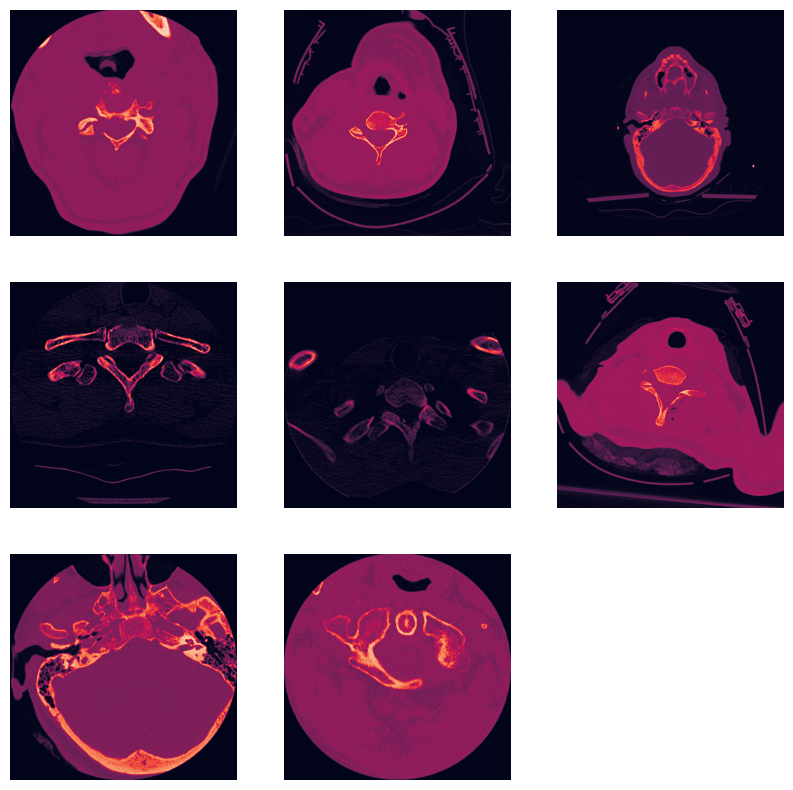

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch)
  print(np.argmax(labels_batch[0]))
  for i in labels_batch:
    print(np.argmax(i))
  break

(8, 384, 384, 1)
(8, 14)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(8, 14), dtype=float32)
13
13
1
13
10
3
5
3
10


##MODELO

In [ ]:
##modelo mayor rendimiento 65%
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(384, 384, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((4, 4), padding='same'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(14, activation='relu'))
model.add(tf.keras.layers.Dense(14, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 384, 384, 16)      160       
_________________________________________________________________
batch_normalization_40 (Batc (None, 384, 384, 16)      64        
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 384, 384, 16)      2320      
_________________________________________________________________
batch_normalization_41 (Batc (None, 384, 384, 16)      64        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 192, 192, 16)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 192, 192, 16)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 192, 192, 32)     

In [ ]:
#early_stopping = EarlyStopping(patience=5, restore_best_weights = True)
opt = tf.keras.optimizers.Adagrad(learning_rate=0.01)
#opt = tf.keras.optimizers.Adadelta(learning_rate=0.01)
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

#history = model.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_test, y_test))

##TRAIN

In [ ]:
opt = tf.keras.optimizers.Adadelta(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
13491/13491 [==============================] - 1690s 125ms/step - loss: 2.5701 - accuracy: 0.1397 - val_loss: 2.3827 - val_accuracy: 0.2376
Epoch 2/20
13491/13491 [==============================] - 1691s 125ms/step - loss: 2.3360 - accuracy: 0.2475 - val_loss: 2.2125 - val_accuracy: 0.3070
Epoch 3/20
13491/13491 [==============================] - 1692s 125ms/step - loss: 2.2049 - accuracy: 0.2971 - val_loss: 2.1136 - val_accuracy: 0.3381
Epoch 4/20
13491/13491 [==============================] - 1693s 126ms/step - loss: 2.1292 - accuracy: 0.3215 - val_loss: 2.0497 - val_accuracy: 0.3538
Epoch 5/20
13491/13491 [==============================] - 1684s 125ms/step - loss: 2.0713 - accuracy: 0.3339 - val_loss: 1.9919 - val_accuracy: 0.3699
Epoch 6/20
13491/13491 [==============================] - 1686s 125ms/step - loss: 2.0159 - accuracy: 0.3466 - val_loss: 1.9312 - val_accuracy: 0.3845
Epoch 7/20
13491/13491 [==============================] - 1686s 125ms/step - loss: 1.9669 - ac

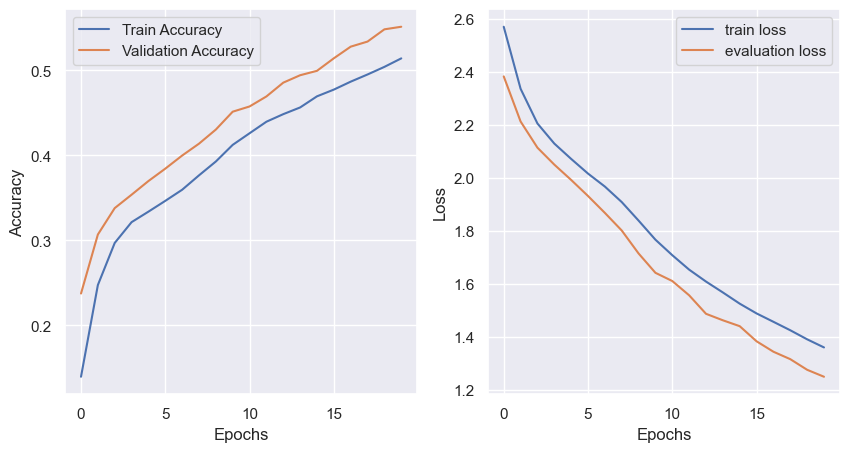

In [ ]:
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#model.save(PATH + 'Modelos/CNN_A2.h5')

In [ ]:
model = tf.keras.models.load_model(PATH+'Modelos/CNN_A.h5')

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
13491/13491 [==============================] - 1707s 127ms/step - loss: 1.3368 - accuracy: 0.5226 - val_loss: 1.2261 - val_accuracy: 0.5615
Epoch 2/10
13491/13491 [==============================] - 1690s 125ms/step - loss: 1.3121 - accuracy: 0.5269 - val_loss: 1.2060 - val_accuracy: 0.5662
Epoch 3/10
13491/13491 [==============================] - 1681s 125ms/step - loss: 1.2866 - accuracy: 0.5366 - val_loss: 1.1731 - val_accuracy: 0.5764
Epoch 4/10
13491/13491 [==============================] - 1682s 125ms/step - loss: 1.2592 - accuracy: 0.5444 - val_loss: 1.1640 - val_accuracy: 0.5830
Epoch 5/10
13491/13491 [==============================] - 1684s 125ms/step - loss: 1.2414 - accuracy: 0.5506 - val_loss: 1.1070 - val_accuracy: 0.5956
Epoch 6/10
13491/13491 [==============================] - 1690s 125ms/step - loss: 1.2182 - accuracy: 0.5550 - val_loss: 1.0996 - val_accuracy: 0.5998
Epoch 7/10
13491/13491 [==============================] - 1685s 125ms/step - loss: 1.2007 - ac

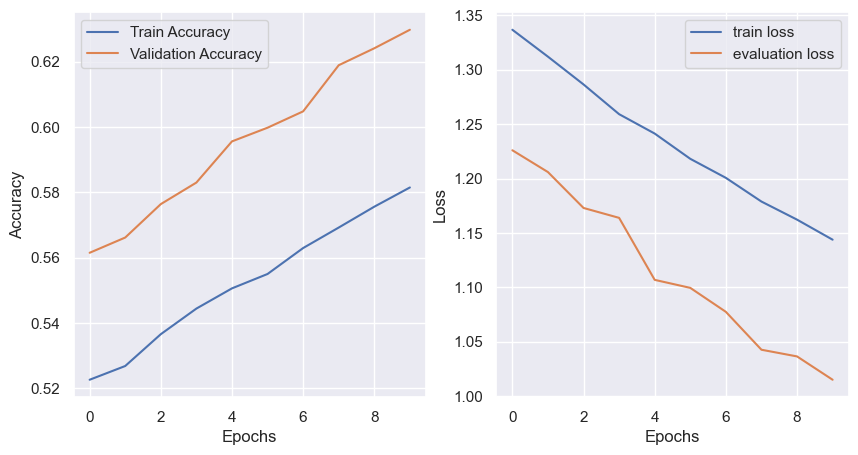

In [ ]:
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#model.save(PATH + 'Modelos/CNN_A2.h5')

In [ ]:
#model.save(PATH + 'Modelos/CNN_A2.h5')

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
13491/13491 [==============================] - 1673s 124ms/step - loss: 1.1276 - accuracy: 0.5873 - val_loss: 1.0108 - val_accuracy: 0.6306
Epoch 2/10
13491/13491 [==============================] - 1672s 124ms/step - loss: 1.1130 - accuracy: 0.5932 - val_loss: 0.9950 - val_accuracy: 0.6362
Epoch 3/10
13491/13491 [==============================] - 1666s 123ms/step - loss: 1.0960 - accuracy: 0.5993 - val_loss: 0.9770 - val_accuracy: 0.6451
Epoch 4/10
13491/13491 [==============================] - 1668s 124ms/step - loss: 1.0828 - accuracy: 0.6030 - val_loss: 0.9552 - val_accuracy: 0.6511
Epoch 5/10
13491/13491 [==============================] - 1666s 124ms/step - loss: 1.0671 - accuracy: 0.6080 - val_loss: 0.9398 - val_accuracy: 0.6563
Epoch 6/10
13491/13491 [==============================] - 1667s 124ms/step - loss: 1.0502 - accuracy: 0.6140 - val_loss: 0.9415 - val_accuracy: 0.6568
Epoch 7/10
13491/13491 [==============================] - 1668s 124ms/step - loss: 1.0364 - ac

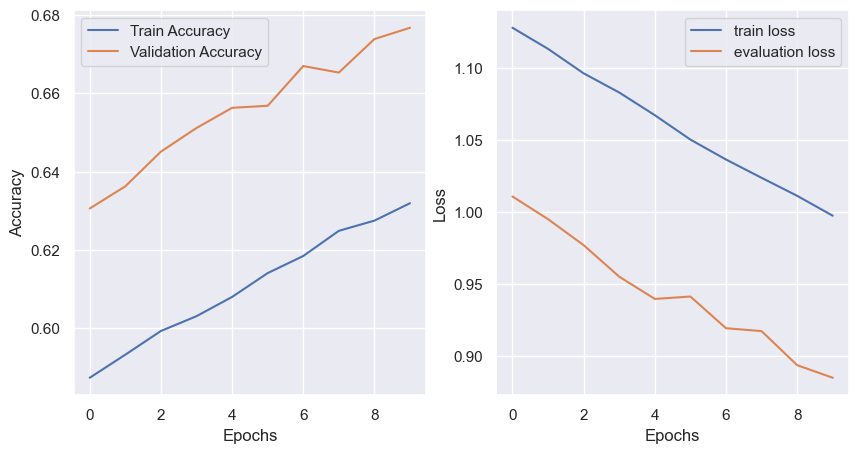

In [ ]:
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#model.save(PATH + 'Modelos/CNN_A3.h5')

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
13491/13491 [==============================] - 1668s 124ms/step - loss: 0.9869 - accuracy: 0.6360 - val_loss: 0.8653 - val_accuracy: 0.6849
Epoch 2/10
13491/13491 [==============================] - 1683s 125ms/step - loss: 0.9790 - accuracy: 0.6398 - val_loss: 0.8610 - val_accuracy: 0.6847
Epoch 3/10
13491/13491 [==============================] - 1690s 125ms/step - loss: 0.9642 - accuracy: 0.6429 - val_loss: 0.8616 - val_accuracy: 0.6857
Epoch 4/10
13491/13491 [==============================] - 1691s 125ms/step - loss: 0.9542 - accuracy: 0.6489 - val_loss: 0.8582 - val_accuracy: 0.6830
Epoch 5/10
13491/13491 [==============================] - 1692s 125ms/step - loss: 0.9482 - accuracy: 0.6488 - val_loss: 0.8346 - val_accuracy: 0.6955
Epoch 6/10
13491/13491 [==============================] - 1693s 126ms/step - loss: 0.9322 - accuracy: 0.6549 - val_loss: 0.8309 - val_accuracy: 0.6927
Epoch 7/10
13491/13491 [==============================] - 1696s 126ms/step - loss: 0.9195 - ac

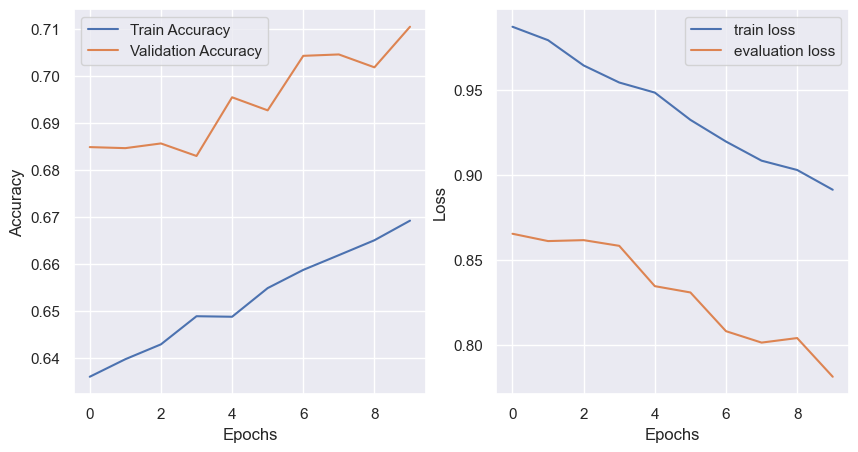

In [ ]:
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#model.save(PATH + 'Modelos/CNN_A4.h5')

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
13491/13491 [==============================] - 1679s 124ms/step - loss: 0.8785 - accuracy: 0.6730 - val_loss: 0.7875 - val_accuracy: 0.7072
Epoch 2/10
13491/13491 [==============================] - 1689s 125ms/step - loss: 0.8738 - accuracy: 0.6762 - val_loss: 0.7883 - val_accuracy: 0.7091
Epoch 3/10
13491/13491 [==============================] - 1690s 125ms/step - loss: 0.8630 - accuracy: 0.6794 - val_loss: 0.7544 - val_accuracy: 0.7207
Epoch 4/10
13491/13491 [==============================] - 1691s 125ms/step - loss: 0.8566 - accuracy: 0.6809 - val_loss: 0.7497 - val_accuracy: 0.7214
Epoch 5/10
13491/13491 [==============================] - 1679s 124ms/step - loss: 0.8468 - accuracy: 0.6844 - val_loss: 0.7640 - val_accuracy: 0.7168
Epoch 6/10
13491/13491 [==============================] - 1692s 125ms/step - loss: 0.8394 - accuracy: 0.6867 - val_loss: 0.7347 - val_accuracy: 0.7265
Epoch 7/10
13491/13491 [==============================] - 1709s 127ms/step - loss: 0.8308 - ac

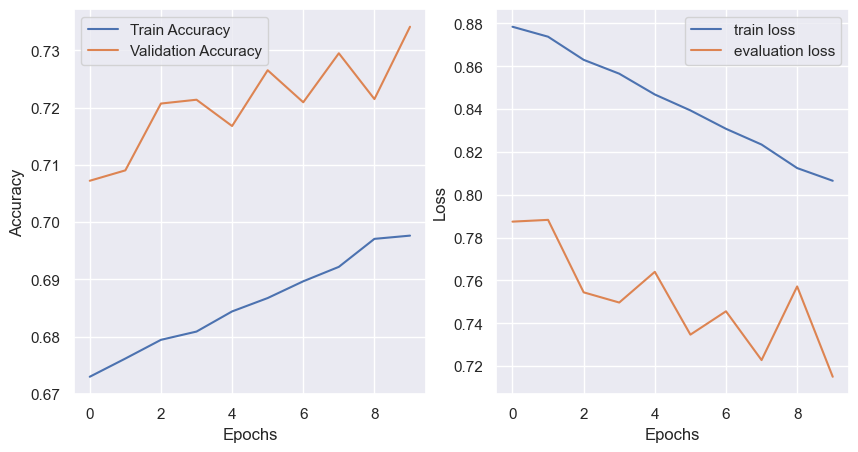

In [ ]:
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#model.save(PATH + 'Modelos/CNN_A5.h5')

In [ ]:
model = tf.keras.models.load_model(PATH+'Modelos/CNN_A5.h5')

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
5117/5117 [==============================] - 736s 144ms/step - loss: 1.6147 - accuracy: 0.4695 - val_loss: 1.1791 - val_accuracy: 0.5700
Epoch 2/10
5117/5117 [==============================] - 733s 143ms/step - loss: 1.3413 - accuracy: 0.5333 - val_loss: 1.2394 - val_accuracy: 0.5531
Epoch 3/10
5117/5117 [==============================] - 738s 144ms/step - loss: 1.2317 - accuracy: 0.5619 - val_loss: 1.2500 - val_accuracy: 0.5501
Epoch 4/10
5117/5117 [==============================] - 736s 144ms/step - loss: 1.1406 - accuracy: 0.5911 - val_loss: 1.2613 - val_accuracy: 0.5493
Epoch 5/10
5117/5117 [==============================] - 735s 144ms/step - loss: 1.0637 - accuracy: 0.6144 - val_loss: 1.3196 - val_accuracy: 0.5370
Epoch 6/10
5117/5117 [==============================] - 743s 145ms/step - loss: 1.0097 - accuracy: 0.6346 - val_loss: 1.3380 - val_accuracy: 0.5328
Epoch 7/10
5117/5117 [==============================] - 742s 145ms/step - loss: 0.9577 - accuracy: 0.6523 - val_

##TRAIN 2

In [ ]:
opt = tf.keras.optimizers.Adadelta(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model = tf.keras.models.load_model(PATH+'Modelos/CNN_A5.h5')

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model.save(PATH + 'Modelos/CNN_B1.h5')

##TEST

In [78]:
model = tf.keras.models.load_model(PATH+'Modelos/CNN_A4.h5')

In [ ]:
##MODEL A4
pacientes = os.listdir(PATH + 'imgs_por_vertebra_test/')
vertebras = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
clases = {0:'C10', 1:'C11', 2:'C20', 3:'C21', 4:'C30', 5:'C31', 6:'C40', 7:'C41', 8:'C50', 9:'C51', 10:'C60', 11:'C61', 12:'C70', 13:'C1'}
labels = pd.read_csv(PATH+'train.csv')

registro = []

for p in pacientes[:10]:

  resultados = {}
  item = labels.index[labels.StudyInstanceUID == p]
  print(p)
  for v in vertebras:
    imgs = os.listdir(PATH + 'imgs_por_vertebra_test/' + p + '/' + v +'/')
    #print(imgs)
    #print('vertebra: ', v)
    
    preds = []
    for img in imgs:
      #print(PATH + 'imgs_por_vertebra_test/'+ p + '/' + v +'/'+img)
      img_to_predict = load_img(PATH + 'imgs_por_vertebra_test/'+ p + '/' + v +'/'+img, color_mode="grayscale")
      img_to_predict = img_to_predict.resize((384, 384))
      img_to_predict = img_to_array(img_to_predict)
      img_to_predict = img_to_predict.reshape( -1,384, 384,1)

      probs_test = model.predict(img_to_predict)
      preds_test = np.argmax(probs_test, axis=-1)
      preds.append(preds_test)

      #print(probs_test)
      #print(preds_test)
    
    unicos = np.unique(preds, return_counts=True)
    #print(val[0], val[1])
    porcentajes = []
    pred_v = []
    vert_pred = 0
    valor_pred = 0
    dim = len(imgs)
    for i in zip(unicos[0], unicos[1]):
      prob = i[1]/dim
      if(valor_pred<prob):
        valor_pred = prob
        vert_pred = i[0]


    
    print('Vertebra: ', v, ':',[clases.get(vert_pred),valor_pred], 'fractura: ',labels[v].iloc[item].values.tolist()[0])
    resultados[v] = [clases.get(vert_pred),valor_pred]
    #print(resultados)
  print({p:resultados, 'C':labels.iloc[item].values.tolist()[0][2:]})
  registro.append({p:resultados, 'C':labels.iloc[item].values.tolist()[0][2:]})

#print(registro)



1.2.826.0.1.3680043.31077
Vertebra:  C1 : ['C20', 0.5] fractura:  0
Vertebra:  C2 : ['C30', 0.9895833333333334] fractura:  0
Vertebra:  C3 : ['C40', 0.6770833333333334] fractura:  1
Vertebra:  C4 : ['C50', 0.4791666666666667] fractura:  1
Vertebra:  C5 : ['C61', 0.3229166666666667] fractura:  1
Vertebra:  C6 : ['C70', 0.9895833333333334] fractura:  1
Vertebra:  C7 : ['C70', 1.0] fractura:  0
{'1.2.826.0.1.3680043.31077': {'C1': ['C20', 0.5], 'C2': ['C30', 0.9895833333333334], 'C3': ['C40', 0.6770833333333334], 'C4': ['C50', 0.4791666666666667], 'C5': ['C61', 0.3229166666666667], 'C6': ['C70', 0.9895833333333334], 'C7': ['C70', 1.0]}, 'C': [0, 0, 1, 1, 1, 1, 0]}
1.2.826.0.1.3680043.31083
Vertebra:  C1 : ['C1', 0.7] fractura:  0
Vertebra:  C2 : ['C20', 1.0] fractura:  0
Vertebra:  C3 : ['C60', 0.7333333333333333] fractura:  0
Vertebra:  C4 : ['C60', 0.9666666666666667] fractura:  0
Vertebra:  C5 : ['C60', 0.4666666666666667] fractura:  0
Vertebra:  C6 : ['C70', 0.6666666666666666] fractu

In [80]:
#MODEL A4
model.evaluate(val_ds)

2917/2917 [==============================] - 131s 45ms/step - loss: 2.2114 - accuracy: 0.4326


[2.2113544940948486, 0.4325946271419525]

In [ ]:
##MODEL A5
pacientes = os.listdir(PATH + 'imgs_por_vertebra_test/')
vertebras = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
clases = {0:'C10', 1:'C11', 2:'C20', 3:'C21', 4:'C30', 5:'C31', 6:'C40', 7:'C41', 8:'C50', 9:'C51', 10:'C60', 11:'C61', 12:'C70', 13:'C1'}
labels = pd.read_csv(PATH+'train.csv')

registro = []

for p in pacientes[:10]:

  resultados = {}
  item = labels.index[labels.StudyInstanceUID == p]
  print(p)
  for v in vertebras:
    imgs = os.listdir(PATH + 'imgs_por_vertebra_test/' + p + '/' + v +'/')
    #print(imgs)
    #print('vertebra: ', v)
    
    preds = []
    for img in imgs:
      #print(PATH + 'imgs_por_vertebra_test/'+ p + '/' + v +'/'+img)
      img_to_predict = load_img(PATH + 'imgs_por_vertebra_test/'+ p + '/' + v +'/'+img, color_mode="grayscale")
      img_to_predict = img_to_predict.resize((384, 384))
      img_to_predict = img_to_array(img_to_predict)
      img_to_predict = img_to_predict.reshape( -1,384, 384,1)

      probs_test = model.predict(img_to_predict)
      preds_test = np.argmax(probs_test, axis=-1)
      preds.append(preds_test)

      #print(probs_test)
      #print(preds_test)
    
    unicos = np.unique(preds, return_counts=True)
    #print(val[0], val[1])
    porcentajes = []
    pred_v = []
    vert_pred = 0
    valor_pred = 0
    dim = len(imgs)
    for i in zip(unicos[0], unicos[1]):
      prob = i[1]/dim
      if(valor_pred<prob):
        valor_pred = prob
        vert_pred = i[0]


    
    print('Vertebra: ', v, ':',[clases.get(vert_pred),valor_pred], 'fractura: ',labels[v].iloc[item].values.tolist()[0])
    resultados[v] = [clases.get(vert_pred),valor_pred]
    #print(resultados)
  print({p:resultados, 'C':labels.iloc[item].values.tolist()[0][2:]})
  registro.append({p:resultados, 'C':labels.iloc[item].values.tolist()[0][2:]})

#print(registro)



1.2.826.0.1.3680043.31077
Vertebra:  C1 : ['C20', 0.5] fractura:  0
Vertebra:  C2 : ['C30', 0.9791666666666666] fractura:  0
Vertebra:  C3 : ['C40', 0.78125] fractura:  1
Vertebra:  C4 : ['C50', 0.5729166666666666] fractura:  1
Vertebra:  C5 : ['C61', 0.4479166666666667] fractura:  1
Vertebra:  C6 : ['C70', 0.9895833333333334] fractura:  1
Vertebra:  C7 : ['C70', 1.0] fractura:  0
{'1.2.826.0.1.3680043.31077': {'C1': ['C20', 0.5], 'C2': ['C30', 0.9791666666666666], 'C3': ['C40', 0.78125], 'C4': ['C50', 0.5729166666666666], 'C5': ['C61', 0.4479166666666667], 'C6': ['C70', 0.9895833333333334], 'C7': ['C70', 1.0]}, 'C': [0, 0, 1, 1, 1, 1, 0]}
1.2.826.0.1.3680043.31083
Vertebra:  C1 : ['C70', 0.43333333333333335] fractura:  0
Vertebra:  C2 : ['C20', 0.9666666666666667] fractura:  0
Vertebra:  C3 : ['C60', 0.7333333333333333] fractura:  0
Vertebra:  C4 : ['C60', 1.0] fractura:  0
Vertebra:  C5 : ['C70', 0.43333333333333335] fractura:  0
Vertebra:  C6 : ['C70', 0.5666666666666667] fractura: 

In [ ]:
#MODEL A5 Evaluados con datos de 100 pacientes distintos a los de entrenamiento
model.evaluate(val_ds)

2917/2917 [==============================] - 131s 45ms/step - loss: 2.3558 - accuracy: 0.4321


[2.355811595916748, 0.4320802390575409]

In [77]:
#MODEL A5 Evaluando los datos con lo que se probo entrenamiento a entrenamiento
model.evaluate(val_ds)

3373/3373 [==============================] - 153s 45ms/step - loss: 0.7150 - accuracy: 0.7341


[0.7150195837020874, 0.734146237373352]

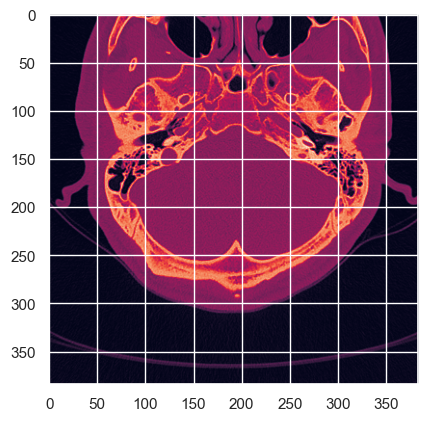

In [ ]:
img_to_predict = load_img(PATH + 'imgs_por_vertebra_test/1.2.826.0.1.3680043.31077/C1/1.jpg', color_mode="grayscale")
img_to_predict = img_to_predict.resize((384, 384))
plt.imshow(img_to_predict)
img_to_predict = img_to_array(img_to_predict)
img_to_predict = img_to_predict.reshape( -1,384, 384,1)



<PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x512 at 0x23604B24908>


<bound method Image.show of <PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x512 at 0x23604B24908>>

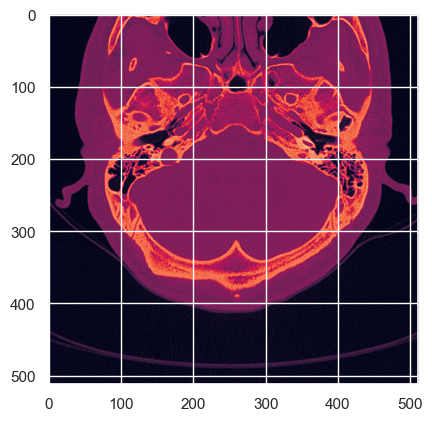

In [ ]:


img = Image.open(PATH + 'imgs_por_vertebra_test/1.2.826.0.1.3680043.31077/C1/1.jpg')
imgGray = img.convert('L')
print(img)
plt.imshow(img)
img.show


In [ ]:
img.show()